# Evolving Niches with Noise
## Publication Images

In [1]:
%load_ext autoreload
%autoreload 2

import logging
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%aimport -matplotlib
%aimport -pandas
%aimport -seaborn
%aimport -numpy
%aimport -logging
%aimport -os

from dataframe.calculations import specific_generation_over_runs
import visualize.dataframe
import analysis.ks
# plt.style.use(['dark_background'])

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(threadName)s - %(name)s - %(levelname)s - %(message)s')

rootlogger = logging.getLogger()
f = logging.Filter(name='evolvingniches')
logger = logging.getLogger('evolvingniches.run')
rootlogger.addFilter(f)
logger = logging.getLogger('evolvingniches.jupyter')

In [2]:
directory_base = '/Users/davk/Documents/phd/projects/EvolvingNiches/data/'
directories = ['20D17_nonoise_300x50', '20D17_g0_c012_i1_300x50',
               '20D22_g300_c012_i1_600x50', '20D23_g300_c012_i1_600x50_b25', '20D23_g300_c012_i1_600x50']
base_runs = [None, None, 104, 125, 105]
experiment_names = ['1','2','3a','3b','3c']

species = [pd.read_parquet(os.path.join(directory_base, d, 'species.parquet')) for d in directories]
spectra = [pd.read_parquet(os.path.join(directory_base, d, 'encoded_spectrum.parquet')) for d in directories]

In [3]:
spectra_ob_fitness = []
for i, (spectrum, specy) in enumerate(zip(spectra,species)):
    gens = range(289,299)
    if i >= 2:
        gens = range(589,599)
    last_10_species = specific_generation_over_runs(gens, data=specy)
    run_role_fitness = last_10_species.groupby(['run','role'])['fitness'].mean()
    run_fitness = run_role_fitness.groupby('run').mean()

    sof = spectrum.join(run_fitness).sort_values(['fitness','generation'], ascending=[False, True])
    sof = sof.drop(columns='fitness')
    spectra_ob_fitness.append(sof)

idx = pd.IndexSlice

## Experiment Individual Plots

Getting Fitness
individual_spectra_1.svg
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `individual_spectra_1.pdf'.
individual_spectra_2.svg
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `individual_spectra_2.pdf'.
individual_spectra_3a.svg
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `individual_spectra_3a.pdf'.
individual_spectra_3b.svg
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `individual_spectra_3b.pdf'.
individual_spectra_3c.svg
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `individual_spectra_3c.pdf'.


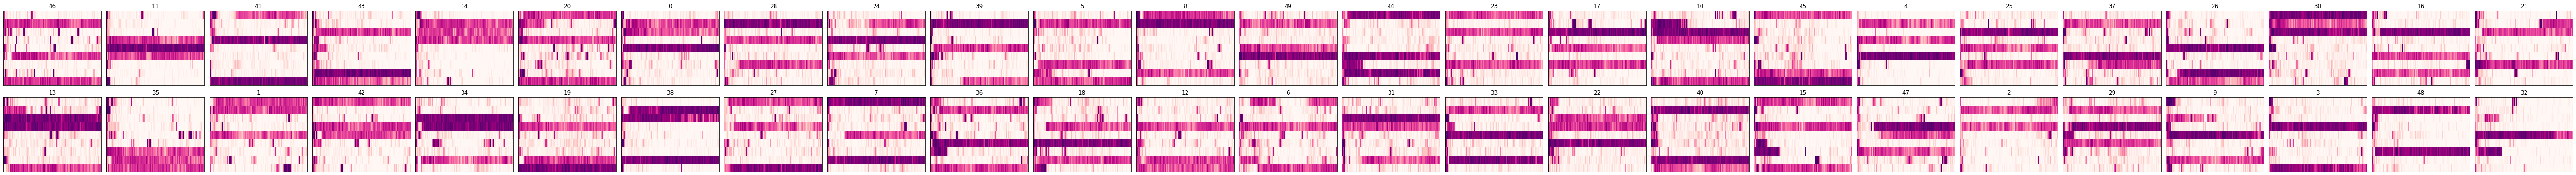

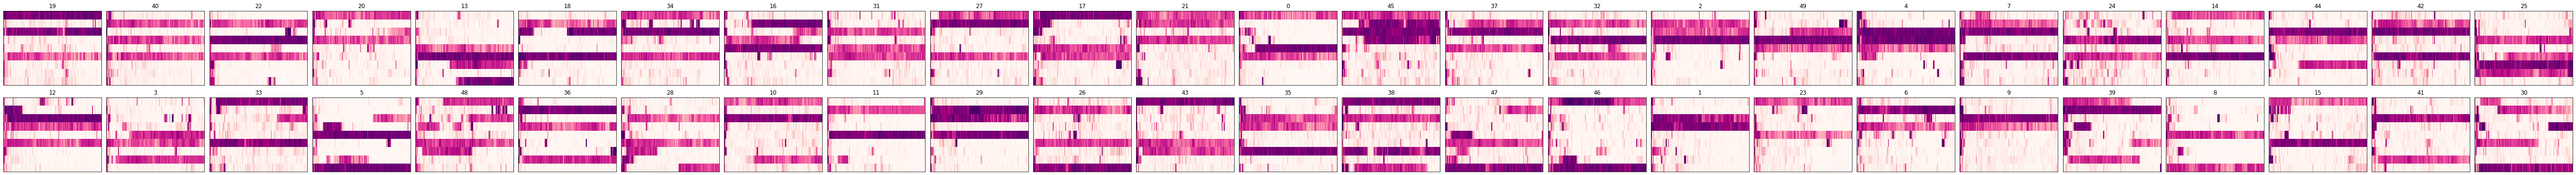

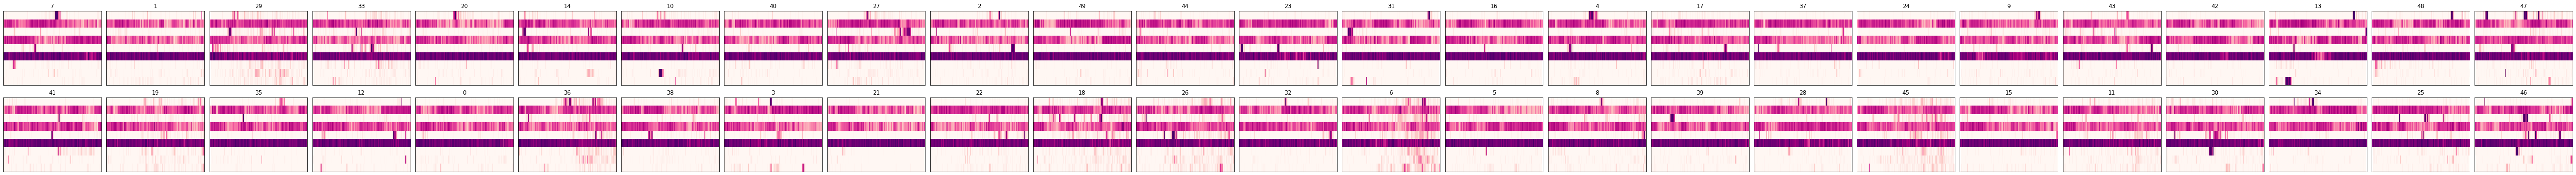

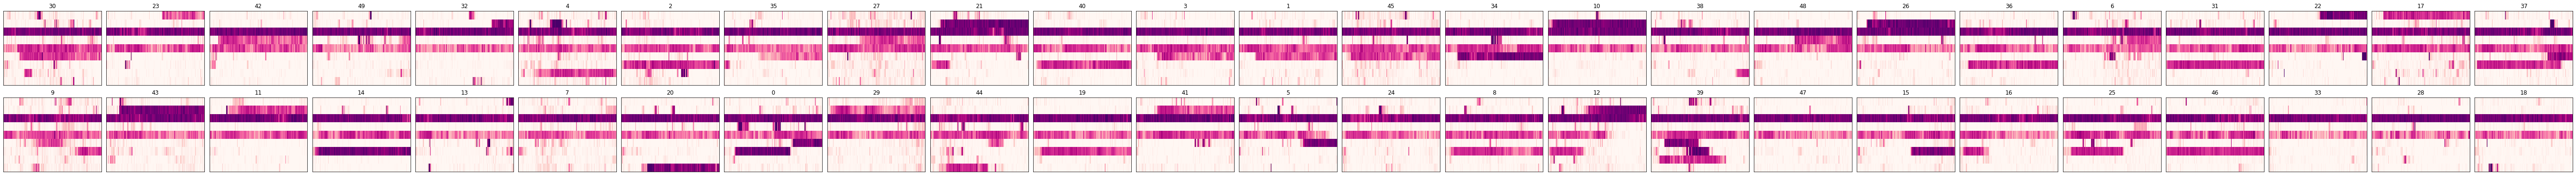

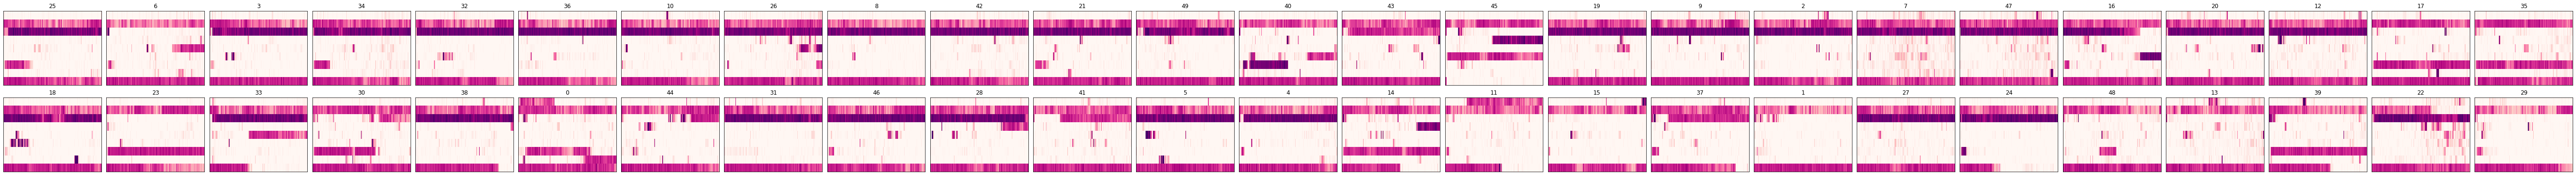

In [15]:
print('Getting Fitness')
for n in range(5):
    sof_n = spectra_ob_fitness[n]
    name = experiment_names[n]
    filename = 'individual_spectra_{}.svg'.format(name)
    pdf_filename = 'individual_spectra_{}.pdf'.format(name)

    visualize.dataframe.plot_run_spectra(sof_n, vmin=0.0, vmax=0.6, view=True, filename=filename, shape=(2, 25),
                                         numbering=True, figsize=(75,5), colorbar=False, title=None, cmap='RdPu')

    !cairosvg {filename} -o {pdf_filename}
    !pdfcrop {pdf_filename} {pdf_filename}

# print('Making plots')
# visualize.dataframe.plot_run_spectra(sof_1.loc[selected_runs], vmin=0.0, vmax=0.6, view=True, filename='individual_spectra_1.svg', shape=(2, 3), numbering=True, figsize=(15,8.5))

In [ ]:
# selected_runs_list = [
#     [46, 5, 25, 3, 32],
#     [19, 13, 2, 11, 30],
#     [7, 44, 48, 5, 46],
#     [30, 32, 48, 41, 18],
#     [25, 45, 46, 1, 29]
# ]
#
# for n in range(5):
#     base_run = base_runs[n]
#     name = experiment_names[n]
#     filename = 'individual_spectra_{}.svg'.format(name)
#     pdf_filename = 'individual_spectra_{}.pdf'.format(name)
#     selected_runs = selected_runs_list[n]
#
#     selected_spec = spectra_ob_fitness[n].loc[selected_runs+[base_run]]
#     selected_fit = species[n].loc[selected_runs+[base_run]]
#     visualize.dataframe.plot_spectra_and_fitness(selected_spec, selected_fit, base_run=base_run,
#                         vmin=0.0, vmax=0.6, view=True, filename=filename, shape=(2,5),
#                         numbering=True, figsize=(10.5,4),
#                         title="Communication spectrum and fitness for selected runs, Experiment {}".format(name))
#
#     print('Converting')
#     !cairosvg {filename} -o {pdf_filename}
#     !pdfcrop {pdf_filename} {pdf_filename}